# Lista 1

### Zaimplementowane biblioteki

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cProfile

### Zadanie 1

In [4]:
def z1(x):
    return (6-2*x)/(6+4*x+x**2)

def z2(x):
    return (6-4*x+x**2)/(6+2*x)

x_axis = np.linspace(-2,2,1000)

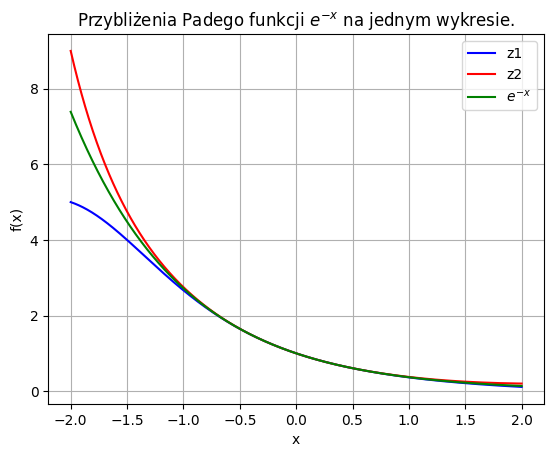

In [6]:
plt.plot(x_axis,z1(x_axis), label="z1", color='blue')
plt.plot(x_axis,z2(x_axis), label='z2', color='red')
plt.plot(x_axis, np.e**(-x_axis), label = r'$e^{-x}$', color='green')
plt.legend()
plt.title(r"Przybliżenia Padego funkcji $e^{-x}$ na jednym wykresie.")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
# plt.savefig('Metody numeryczne/lista 1/Jeden_wykres.png')

Text(0.5, 0.98, 'Przybliżenia Padego funkcji $e^{-x}$ na wielu wykresach.')

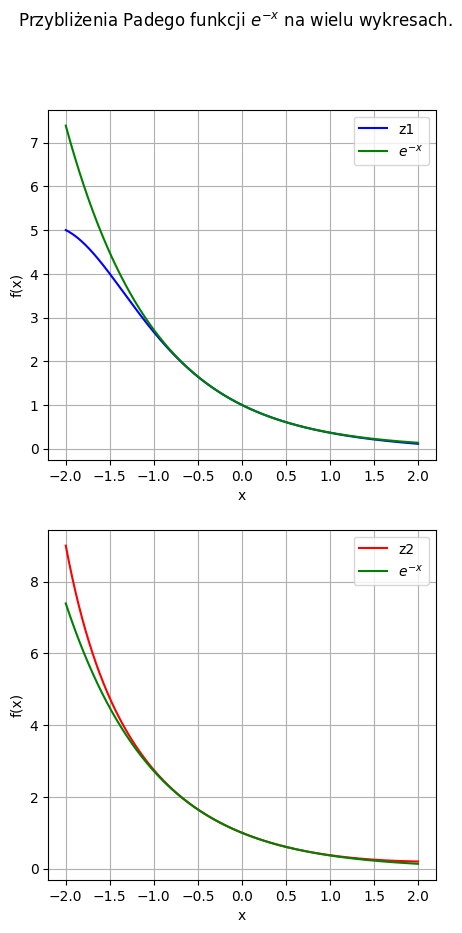

In [7]:
fig ,ax = plt.subplots(2, 1, figsize = (5,10))
ax[0].plot(x_axis,z1(x_axis), label="z1", color='blue')
ax[0].plot(x_axis, np.e**(-x_axis), label = r'$e^{-x}$', color='green')
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[1].plot(x_axis,z2(x_axis), label="z2", color='red')
ax[1].plot(x_axis, np.e**(-x_axis), label = r'$e^{-x}$', color='green')
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel('x')
ax[1].set_ylabel('f(x)')
plt.suptitle(r"Przybliżenia Padego funkcji $e^{-x}$ na wielu wykresach.")
# plt.savefig('Metody numeryczne/lista 1/Wiele_wykresow.png')

Text(0.5, 0.98, 'Błędy bezwzględne przybliżeń Padego')

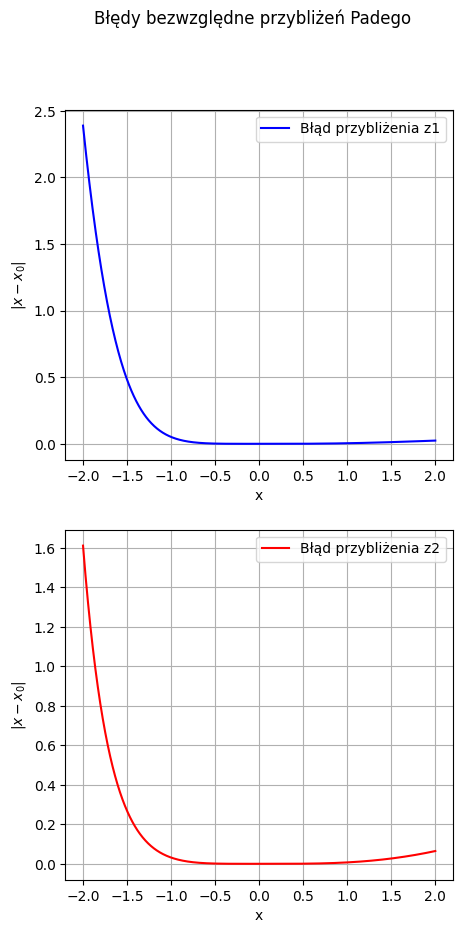

In [8]:
fig, ax = plt.subplots(2, 1, figsize = (5,10))
ax[0].plot(x_axis, np.abs(np.e**(-x_axis)-z1(x_axis)), label='Błąd przybliżenia z1', color='blue')
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$|x-x_0|$')
ax[1].plot(x_axis, np.abs(np.e**(-x_axis)-z2(x_axis)), label='Błąd przybliżenia z2', color='red')
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel('x')
ax[1].set_ylabel(r'$|x-x_0|$')
plt.suptitle("Błędy bezwzględne przybliżeń Padego")
# plt.savefig('Metody numeryczne/lista 1/Błędy.png')

### Zadanie 2

In [9]:
epsilon = 1

while 1+epsilon != 1:
    epsilon *= 0.5

print(epsilon*2)
print(np.finfo(float).eps)

2.220446049250313e-16
2.220446049250313e-16


### Zadanie 3

In [10]:
print(7/100*100-7)

nums = []
for i in range(1,51):
    if i/100*100-i != 0.0:
        nums.append(i)
nums

8.881784197001252e-16


[7, 14, 28, 29]

### Zadanie 4

In [16]:
def fraction(num):
    sum = 0
    step = 1
    for i in iter(str(num)):
        sum += int(i)*2**(-step)
        step += 1
    return sum

x = (-1)**0 * 2**(int('01111111', 2)-127)*(1+fraction('10110011001100110011001'))
print(x)
print(f'Błąd bezwzględny wynosi {1.7-x}')
print(f'Błąd względny wynosi {(1.7-x)/1.7*100:.6f}%')

1.6999999284744263
Błąd bezwzględny wynosi 7.152557368605983e-08
Błąd względny wynosi 0.000004%


### Zadanie 5

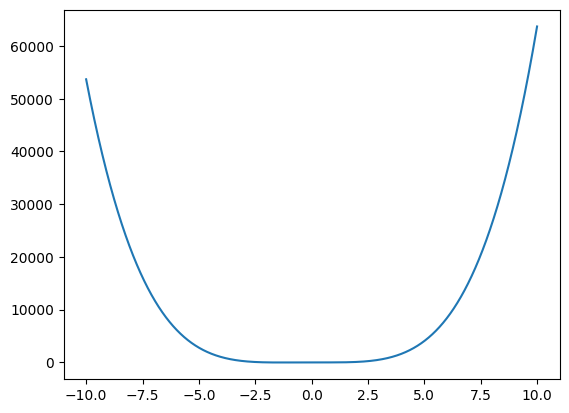

         6 function calls in 0.035 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.034    0.034    0.034    0.034 2405804755.py:1(w)
        1    0.000    0.000    0.035    0.035 2405804755.py:4(eval_pol)
        1    0.000    0.000    0.035    0.035 <string>:1(<module>)
        1    0.000    0.000    0.035    0.035 {built-in method builtins.exec}
        1    0.001    0.001    0.001    0.001 {built-in method numpy.arange}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [19]:
def w(x):
    return 6*x**4+5*x**3-13*x**2+x+1

def eval_pol(bound, dx, pol):
    xs = np.arange(-bound, bound, dx)
    return pol(xs)

xs = np.arange(-10,10,0.0001)
ys = eval_pol(10, 0.0001, w)
plt.plot(xs, ys)
plt.show()

cProfile.run('eval_pol(10, 0.0001, w)')

### Zadanie 6

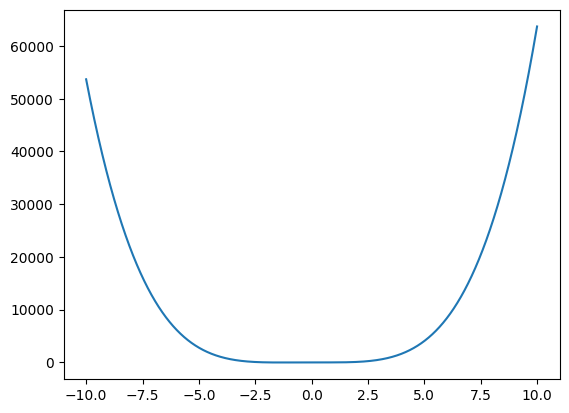

[53691.         53688.77613437 53686.55233748 ... 63703.42803515
 63705.9519483  63708.47593619]
         5 function calls in 0.006 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.006    0.006    0.006    0.006 3936931538.py:1(eval_pol)
        1    0.000    0.000    0.006    0.006 <string>:1(<module>)
        1    0.000    0.000    0.006    0.006 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [20]:
def eval_pol(x, coeff):
    p = coeff[-1]
    n = len(coeff)
    for i in range(1, n):
        p = coeff[n-i-1] + p*x
    return p

xs = np.arange(-10,10,0.0001)
ys = eval_pol(xs, [1,1,-13,5,6])
plt.plot(xs, ys)
plt.show()
print(ys)

cProfile.run('eval_pol(xs, [1,1,-13,5,6])')